# Assignment-3 - Text Based Analysis
## Text Analytics, Social Media Scrapping
### krishna , SHU ID 0916341


#### Data Collection from the web
Data can be collected using APIs, specifically  for social media 

Data can be “Scrapped” from any website (using scrapy & Regularexpressions)

## Authentication

In [2]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\geeth\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"Guns"** subreddit channel will be use for this project

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Guns").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Official Politics Thread 02/14/2024
1aqjz6y
42AngryPandas
1707907247.0
45
0.9
https://www.reddit.com/r/guns/comments/1aqjz6y/official_politics_thread_02142024/
0


**Get total comment in Subreddit**

In [6]:
headlines = set()
for submission in reddit.subreddit("Guns").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

763


### Create a dataframe from the scrapped data

In [7]:
Guns_df = pd.DataFrame(headlines)
Guns_df.head()

,0
0,Gun safe lock opens easily but it is getting h...
1,Is WalMart Legit?
2,4473 Address Concern
3,What IWB holster do you recommend for the Cani...
4,Trying to spray paint my Ar15


### columns

In [9]:
Guns_df.columns

RangeIndex(start=0, stop=1, step=1)

In [10]:
Guns_df.columns = ['Titles']
Guns_df.head()

,Titles
0,Gun safe lock opens easily but it is getting h...
1,Is WalMart Legit?
2,4473 Address Concern
3,What IWB holster do you recommend for the Cani...
4,Trying to spray paint my Ar15


### Next we have to remove emoji & Unicode from the reddit data.

In [11]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Guns_df["Titles"]= Guns_df["Titles"].apply(remove_emoji)

#Show the clean text
Guns_df.head()

,Titles
0,Gun safe lock opens easily but it is getting h...
1,Is WalMart Legit?
2,4473 Address Concern
3,What IWB holster do you recommend for the Cani...
4,Trying to spray paint my Ar15


## Remove Stop words

In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
Guns_df['clean_tokens'] = Guns_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(Guns_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
758                  Ear pro in self defense situation   
759                     Questions about pawn shop guns   
760                      I bought this ADM factory SBR   
761                 Gun Talk Tuesday - 6 February 2024   
762  Unknown Mosin Nagant variant in my museums col...   

                                          clean_tokens  
758               [Ear, pro, self, defense, situation]  
759                      [Questions, pawn, shop, guns]  
760                        [bought, ADM, factory, SBR]  
761         [Gun, Talk, Tuesday, -, 6, February, 2024]  
762  [Unknown, Mosin, Nagant, variant, museums, col...  


## Function to remove stop words

In [13]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
Guns_df['clean_tokens'] = Guns_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(Guns_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
758                  Ear pro in self defense situation   
759                     Questions about pawn shop guns   
760                      I bought this ADM factory SBR   
761                 Gun Talk Tuesday - 6 February 2024   
762  Unknown Mosin Nagant variant in my museums col...   

                                          clean_tokens  
758               [Ear, pro, self, defense, situation]  
759                      [Questions, pawn, shop, guns]  
760                        [bought, ADM, factory, SBR]  
761         [Gun, Talk, Tuesday, -, 6, February, 2024]  
762  [Unknown, Mosin, Nagant, variant, museums, col...  


## Pipeline

In [61]:
# Fetch Reddit data
headlines = []
for submission in reddit.subreddit("Guns").hot(limit=None):
    headlines.append(submission.title)

# Create DataFrame from Reddit data
Guns_df = pd.DataFrame({'Titles': headlines})

# Define the pipeline
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

# Apply the pipeline to the 'Titles' column
Guns_df['clean_tokens'] = Guns_df['Titles'].apply(preprocess_text)

# Display the DataFrame with the processed tokens
print(Guns_df[['Titles', 'clean_tokens']].head())

                                Titles  \
0  Official Politics Thread 02/14/2024   
1        Thickheaded Thursday 02/15/24   
2        You should shoot competitions   
3  Is this considered a good shooting?   
4               Going back to classics   

                               clean_tokens  
0  [official, politics, thread, 02/14/2024]  
1         [thickheaded, thursday, 02/15/24]  
2                     [shoot, competitions]  
3           [considered, good, shooting, ?]  
4                   [going, back, classics]  


In [15]:
print(Guns_df['clean_tokens'].head())

0    [welcome, /r/cancer, ,, sorry, 're, ., please,...
1                           [scans, ’, go, planned, .]
2              [difficult, decisions, around, surgery]
3         [smoking, apparently, causes, vulva, cancer]
4                          [benefits, tennessee, ?, ?]
Name: clean_tokens, dtype: object


In [16]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Create a function to get the subjectivity

In [17]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Guns_df['Subjectivity'] = Guns_df['Titles'].apply(getSubjectivity)
Guns_df['Polarity'] = Guns_df['Titles'].apply(getPolarity)

#Now display data
Guns_df.head()

,Titles,clean_tokens,Subjectivity,Polarity
0,"Welcome to /R/Cancer, sorry you're here. Pleas...","[welcome, /r/cancer, ,, sorry, 're, ., please,...",0.95,0.0875
1,Scans didn’t go as planned.,"[scans, ’, go, planned, .]",0.00,0.0000
2,difficult decisions around surgery,"[difficult, decisions, around, surgery]",1.00,-0.5000
3,Smoking apparently causes vulva cancer,"[smoking, apparently, causes, vulva, cancer]",0.35,0.0500
4,Benefits from Tennessee??,"[benefits, tennessee, ?, ?]",0.00,0.0000


## Data Visualization

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\geeth\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


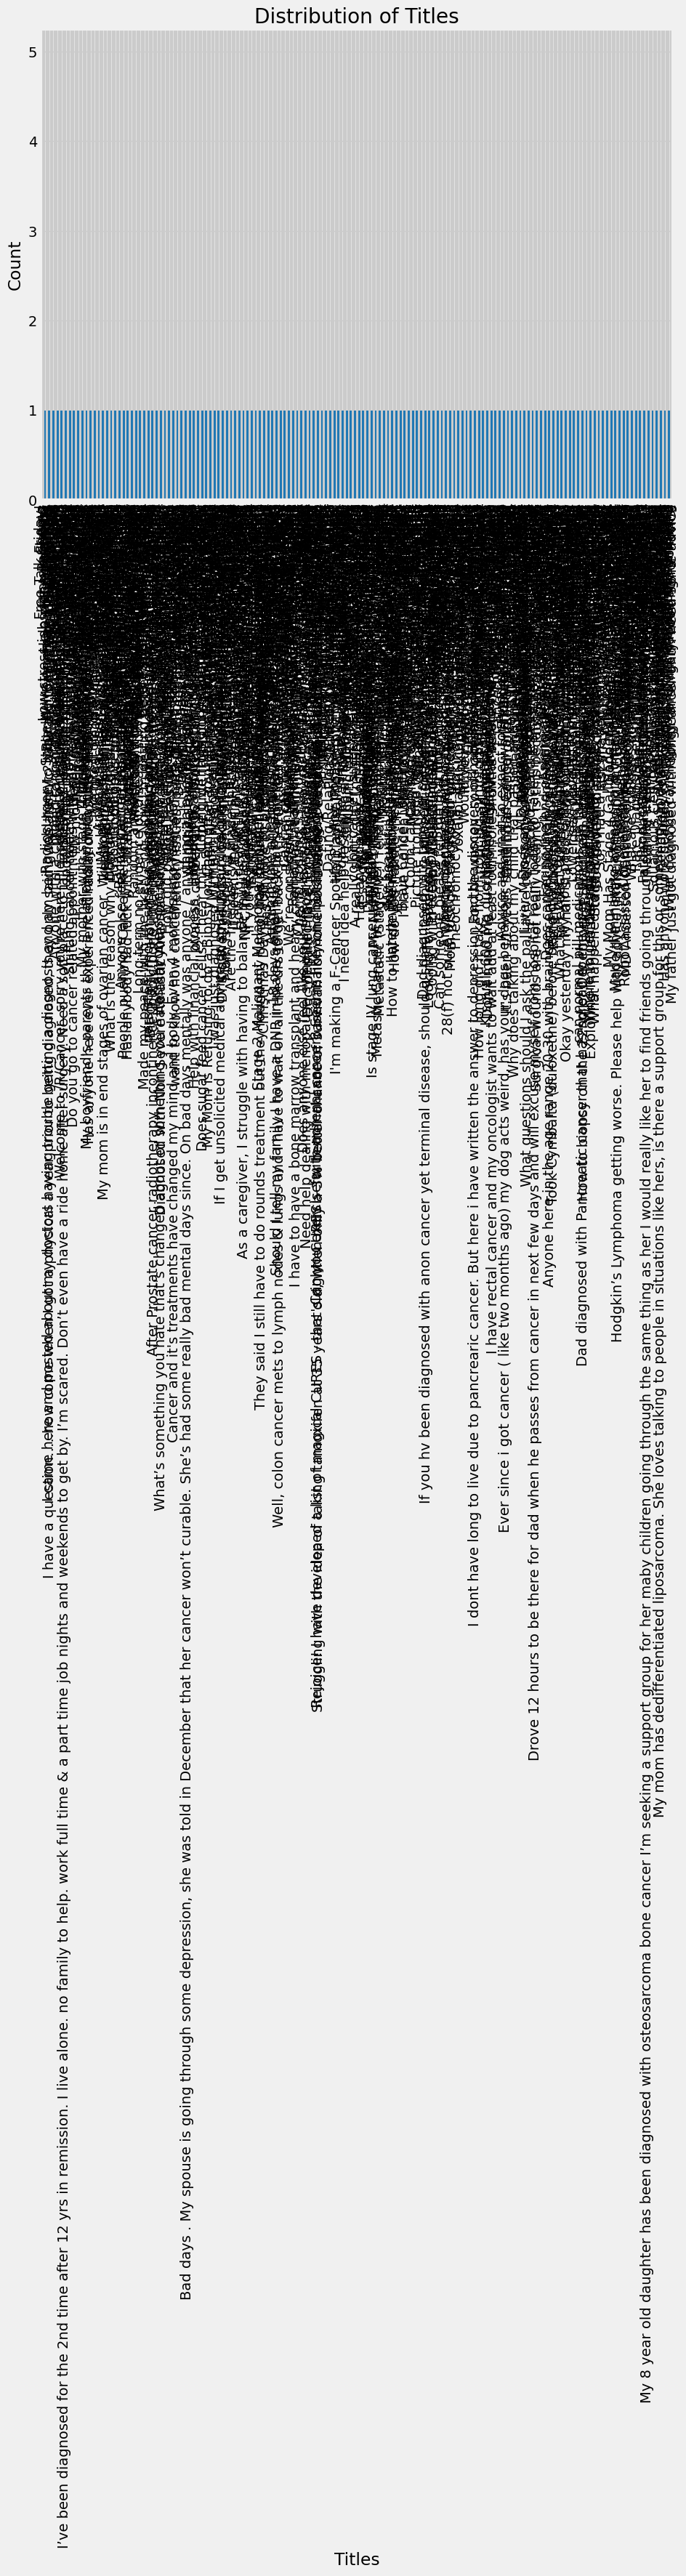

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
Guns_df["Titles"].value_counts().plot(kind="bar", color="#2078B4")
plt.xlabel("Titles")
plt.ylabel("Count")
plt.title("Distribution of Titles")
plt.show()



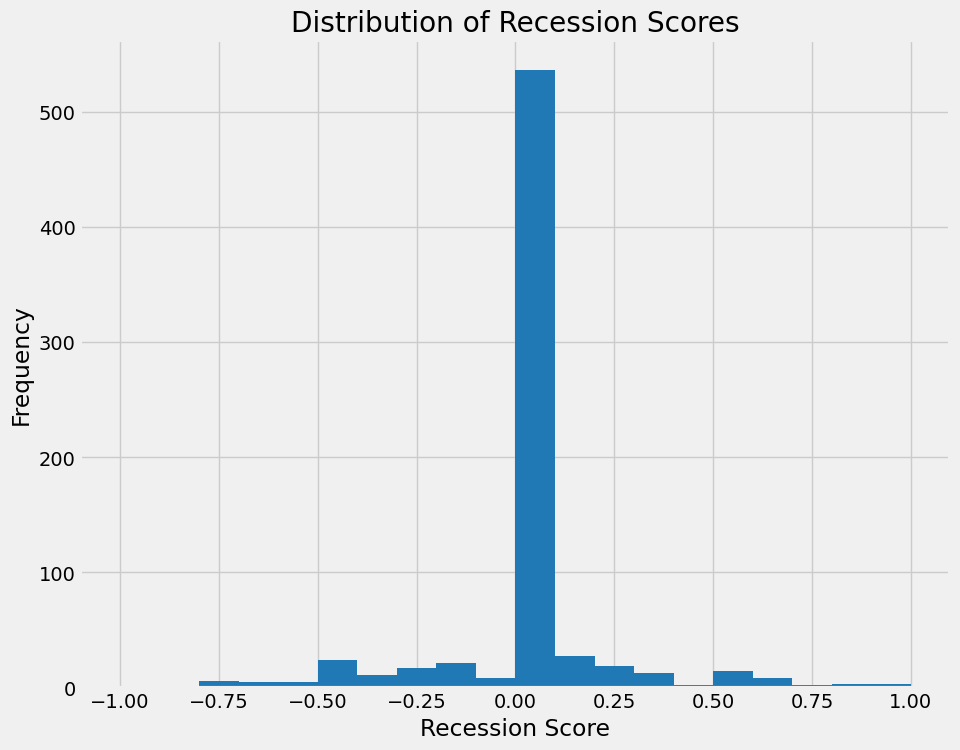

In [29]:
plt.figure(figsize=(10, 8))
Guns_df["Polarity"].plot(kind="hist", bins=20, color="#2078B4")
plt.xlabel("Recession Score")
plt.ylabel("Frequency")
plt.title("Distribution of Recession Scores")
plt.show()


# Wordcloud

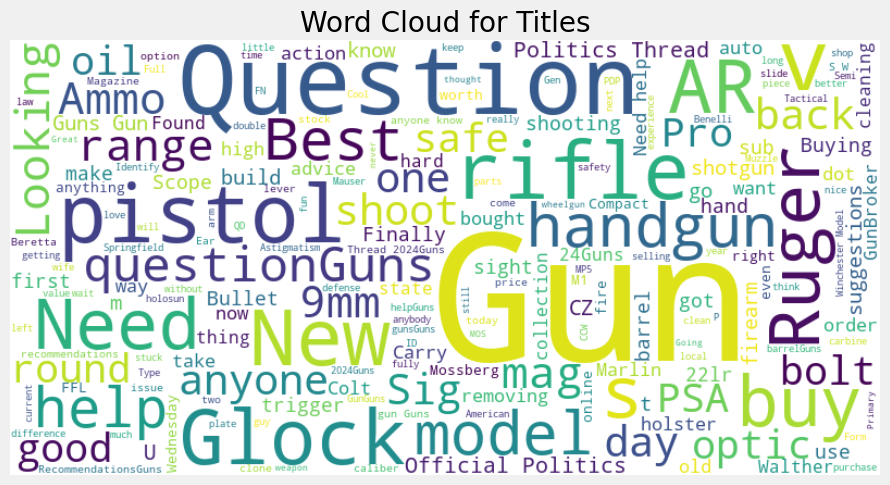

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate text values from the "Titles" column
text = 'Guns '.join(Guns_df["Titles"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Titles")
plt.show()



## wordcloud theme in pistol shape

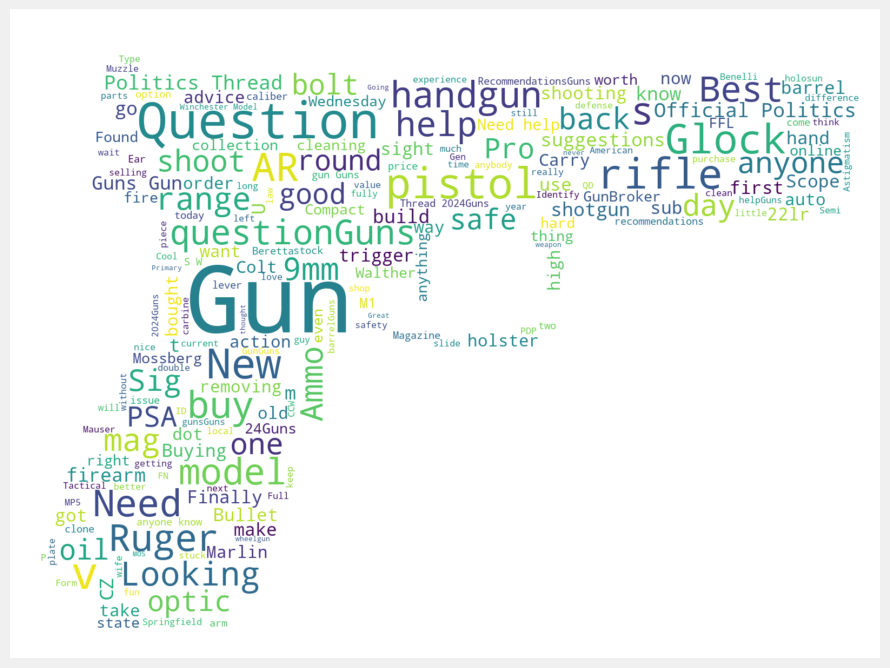

In [63]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

# Read the gun-shaped mask image
gun_mask = np.array(Image.open("C:/Users/geeth/OneDrive/Desktop/gun.jpeg"))

# Concatenate text values from the "Titles" column
text = 'Guns '.join(Guns_df["Titles"].astype(str))

# Create WordCloud with the gun-shaped mask
wc = WordCloud(mask=gun_mask, background_color='white', contour_width=0, contour_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



# wordcloud theme in rifles shape¶

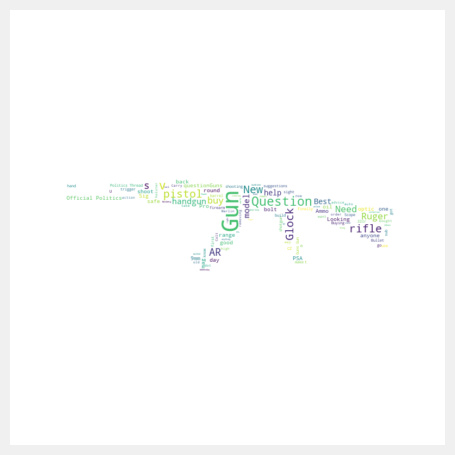

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Read the gun-shaped mask image
gun_mask = np.array(Image.open("C:/Users/geeth/OneDrive/Desktop/ak.webp"))

# Generate the word cloud using the gun-shaped mask
wordcloud = WordCloud(mask=gun_mask, contour_color='steelblue', background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(5,8 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Get the Bing liu Lexicon

In [66]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download the Opinion Lexicon
nltk.download('opinion_lexicon')

# Assuming you have a DataFrame named bitcoin_df with a 'Titles' column
# Replace 'Titles' with your actual column name if different

# Tokenize and calculate sentiment scores
Guns_df['clean_tokens'] = Guns_df['Titles'].apply(lambda x: word_tokenize(str(x)))
Guns_df['positive_score'] = Guns_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.positive()))
Guns_df['negative_score'] = Guns_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.negative()))

# Calculate a sentiment score (positive - negative)
Guns_df['sentiment_score'] = Guns_df['positive_score'] - Guns_df['negative_score']

# Display the DataFrame with sentiment scores
print(Guns_df[['Titles', 'positive_score', 'negative_score', 'sentiment_score']].head())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


                                Titles  positive_score  negative_score  \
0  Official Politics Thread 02/14/2024               0               0   
1        Thickheaded Thursday 02/15/24               0               0   
2        You should shoot competitions               0               0   
3  Is this considered a good shooting?               1               0   
4               Going back to classics               0               0   

   sentiment_score  
0                0  
1                0  
2                0  
3                1  
4                0  


In [67]:
# Print the DataFrame
print(Guns_df)

# Print summary information
print(Guns_df.info())


                                                Titles  \
0                  Official Politics Thread 02/14/2024   
1                        Thickheaded Thursday 02/15/24   
2                        You should shoot competitions   
3                  Is this considered a good shooting?   
4                               Going back to classics   
..                                                 ...   
758                                  Long Canadian B&T   
759                        I hate my Sig - Am I crazy?   
760     Tannerite charge smaller than white lightning?   
761                         ISU-22 Ruger .22lr RC Tank   
762  A week after my pistol was stolen from my truc...   

                                          clean_tokens  positive_score  \
0             [Official, Politics, Thread, 02/14/2024]               0   
1                    [Thickheaded, Thursday, 02/15/24]               0   
2                   [You, should, shoot, competitions]               0   
3      